 Import necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

Load Dataset

In [16]:
df = pd.read_csv("C:/Users/mohdf/Downloads/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv")


Preprocess dataset

In [17]:
#  drop duplicates
df = df.drop_duplicates()

In [18]:
# Convert True/False to 1/0 for 'Revenue' and 'Weekend'
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [19]:
# Encode categorical values
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

Split data

In [20]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Handling imbalanced data

In [22]:
# Apply SMOTE to training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Scaling data

In [25]:
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train_res)
X_test_scaled_lr = scaler.transform(X_test)

Model Building

In [26]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(kernel='rbf')
}

Model Training and Evaluation

In [ ]:
# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy_scores[name] = acc
    f1_scores[name] = f1
    confusion_matrices[name] = cm
    
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print(f"{name} Confusion Matrix:\n", cm)

c:\Users\mohdf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3116
           1       0.57      0.71      0.63       546

    accuracy                           0.88      3662
   macro avg       0.76      0.81      0.78      3662
weighted avg       0.89      0.88      0.88      3662

Logistic Regression Confusion Matrix:
 [[2825  291]
 [ 157  389]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      3116
           1       0.35      0.65      0.46       546

    accuracy                           0.77      3662
   macro avg       0.64      0.72      0.66      3662
weighted avg       0.84      0.77      0.79      3662

KNN Confusion Matrix:
 [[2460  656]
 [ 189  357]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      3116
        

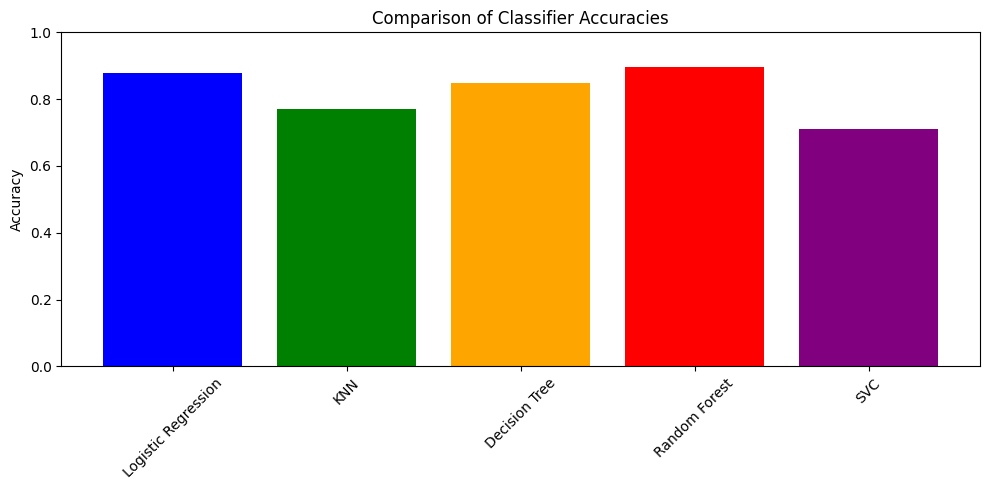

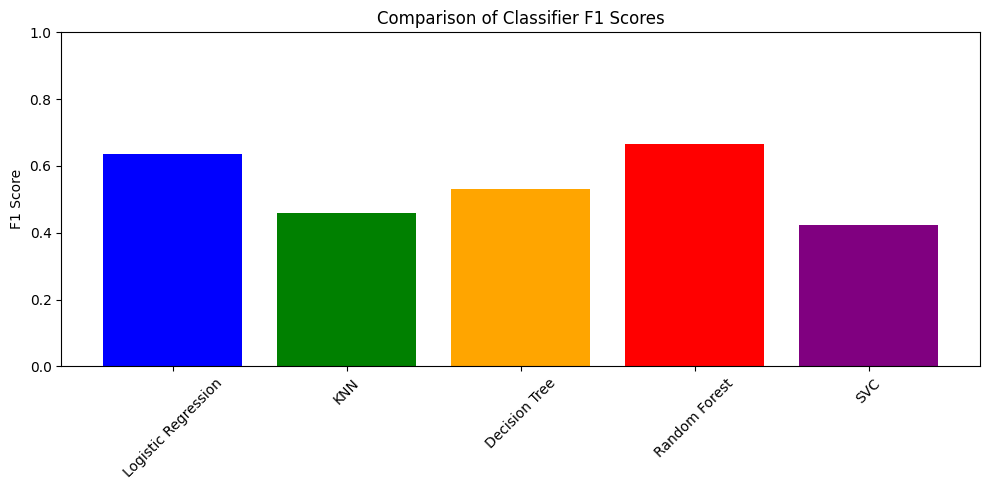

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Classifier Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(10,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Comparison of Classifier F1 Scores")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

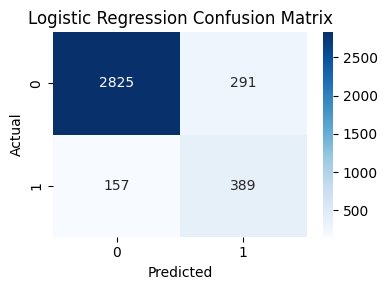

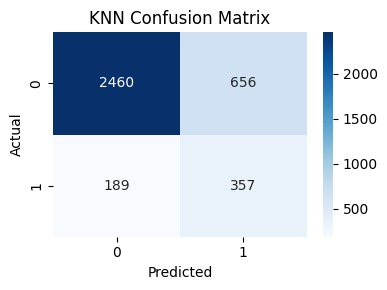

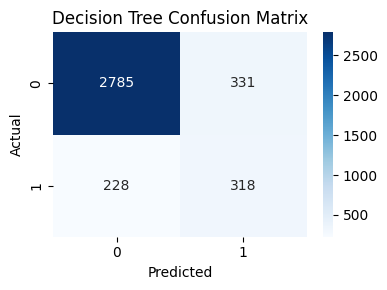

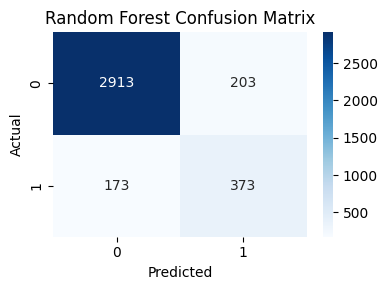

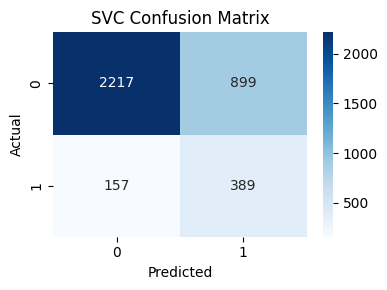

In [ ]:
# Plot confusion matrices for each model
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

Based on the initial evaluation, the Random Forest algorithm demonstrated the highest overall accuracy and a good balance of precision and recall for the positive class
(shoppers who made a purchase). It generally outperformed other models in terms of correctly identifying both purchasers and non-purchasers, as indicated by the 
classification report and confusion matrix. While other models had their strengths,Random Forest's robust performance across multiple metrics makes it a strong candidate for this 
 task.

Random Forest Algorithm

In [28]:
random_forest_classifier = RandomForestClassifier(random_state=42)

In [29]:
# Train the Random Forest model
random_forest_classifier.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(X_test)

In [31]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=1)
report_rf = classification_report(y_test, y_pred_rf, zero_division=1)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [32]:
print("\n--- Random Forest Performance (Separate Implementation) ---")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print("Random Forest Classification Report:\n", report_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)


--- Random Forest Performance (Separate Implementation) ---
Random Forest Accuracy: 0.8973
Random Forest F1-Score: 0.6673
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3116
           1       0.65      0.69      0.67       546

    accuracy                           0.90      3662
   macro avg       0.80      0.81      0.80      3662
weighted avg       0.90      0.90      0.90      3662

Random Forest Confusion Matrix:
 [[2909  207]
 [ 169  377]]
